In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [3]:
csv_file = "/Users/robertjost/Fall_2025/Biogeochemistry/Ecosystem_NPP.csv"
npp_df = pd.read_csv(csv_file)

In [18]:
npp_df

,Site,Vegetation,MeanNPPobs_gCm−2yr−1,Precipitation_cm,MAT_C,C:N
0,Mid-west Agricultrual,Corn,839,99,11.23,10
1,Mid-west Agricultrual,Soybean,379,99,11.23,11
2,Temperate Forest,Deciduous Forest,679,111,8.31,24
3,Temperate Forest,Conifer Forest,552,111,8.31,37
4,Temperate Conifer,Conifer Forest,356,44,7.75,40
5,Boreal Forest,Upland Black Spruce,251,52,-3.20,60
6,Boreal Forest,Open Black Spruce,181,52,-3.20,50
7,Arctic Plain,Grassland,64,5,-10.91,25
8,Desert grassland,Grassland,54,35,13.57,24


The columns in the table are as follows: 

Site: The research site/general ecosystem type where NPP measurements were made

Vegetation: The vegetation type for each NPP measurement (some sites had NPP measurements for multiple vegetation types)

MeanNPPobs_gCm−2yr−1: Mean observed net primary productivity in grams of carbon per meter squared per year. 

Precipitation_cm: Annual Precipitation in centimeters

MAT_C:  Mean annual temperature in degrees Celsius 

C:N:  Foliar carbon to nitrogen ratios 

In [4]:
veg_type = npp_df.groupby('Vegetation', observed=True)
site_type = npp_df.groupby('Site', observed=True)


In [12]:
# Plotting Variables
marker_types = ['o', 's', '^', 'D', 'v']

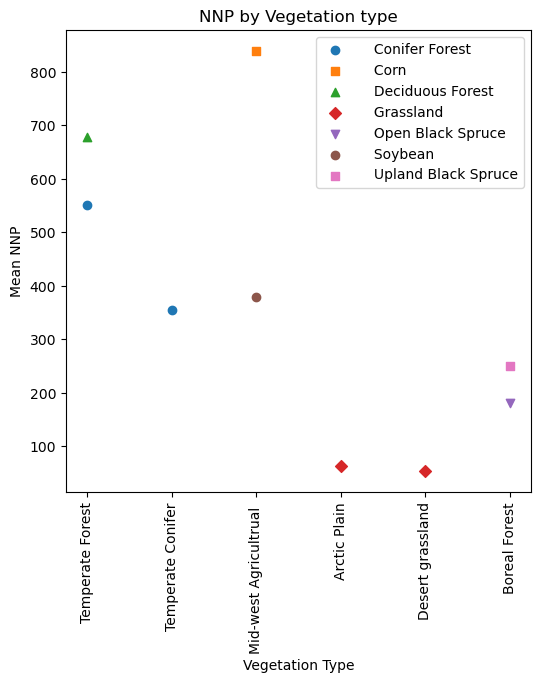

In [31]:
# one variable plotted
plt.figure(figsize=(6,6))
for idx, (name, group) in enumerate(veg_type):
    marker = marker_types[idx % len(marker_types)]
    plt.scatter(group["Site"], group['MeanNPPobs_gCm−2yr−1'], marker=marker, label=name)
plt.xlabel("Vegetation Type")
plt.xticks(rotation=90)
plt.ylabel("Mean NNP")
plt.title("NNP by Vegetation type")
plt.legend()
plt.show()

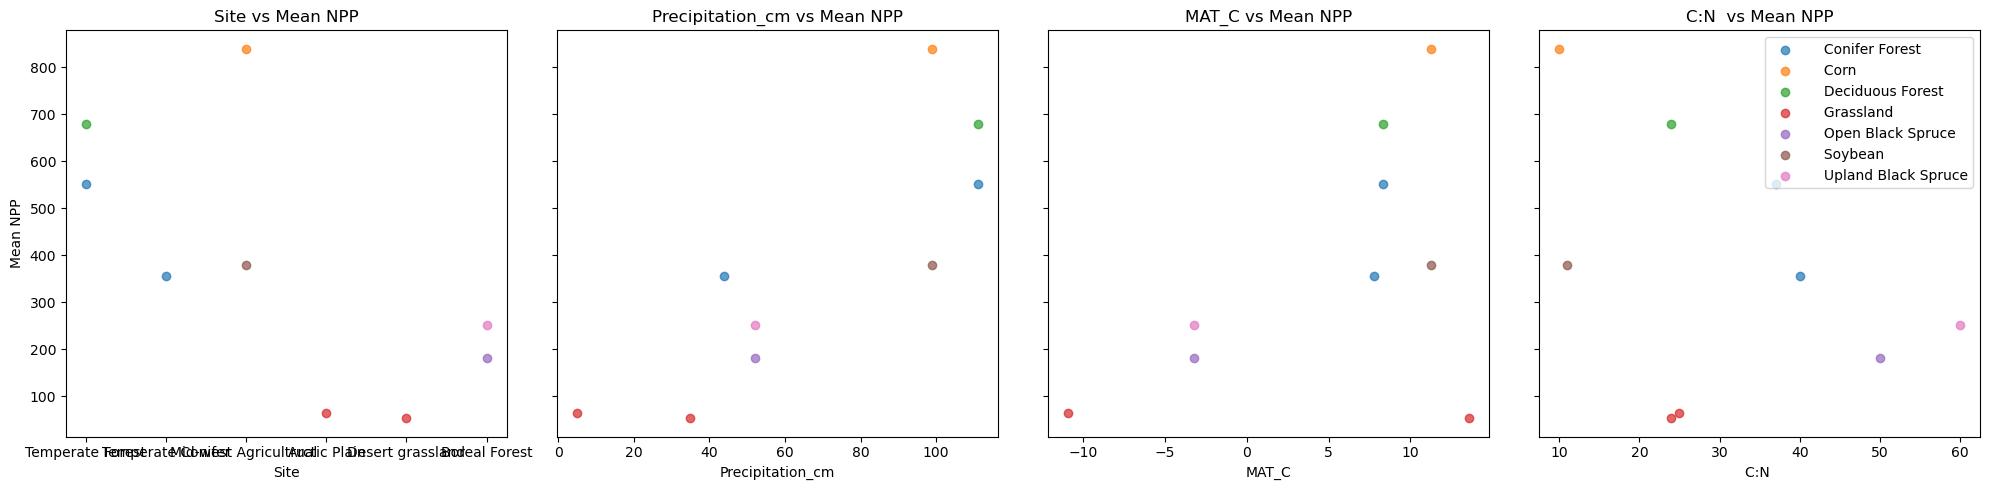

In [ ]:
# all variables plotted
columns_to_plot = [col for col in npp_df.columns if col not in ['MeanNPPobs_gCm−2yr−1', 'Vegetation']]

fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(5 * len(columns_to_plot), 5), sharey=True)

for idx, col in enumerate(columns_to_plot):
    ax = axes[idx]
    for name, group in veg_type:
        ax.scatter(group[col], group['MeanNPPobs_gCm−2yr−1'], label=name, alpha=0.7)
    ax.set_xlabel(col)
    ax.set_title(f'{col} vs Mean NPP')
    if idx == 0:
        ax.set_ylabel('Mean NPP')
    
ax.legend()
plt.tight_layout()
plt.show()

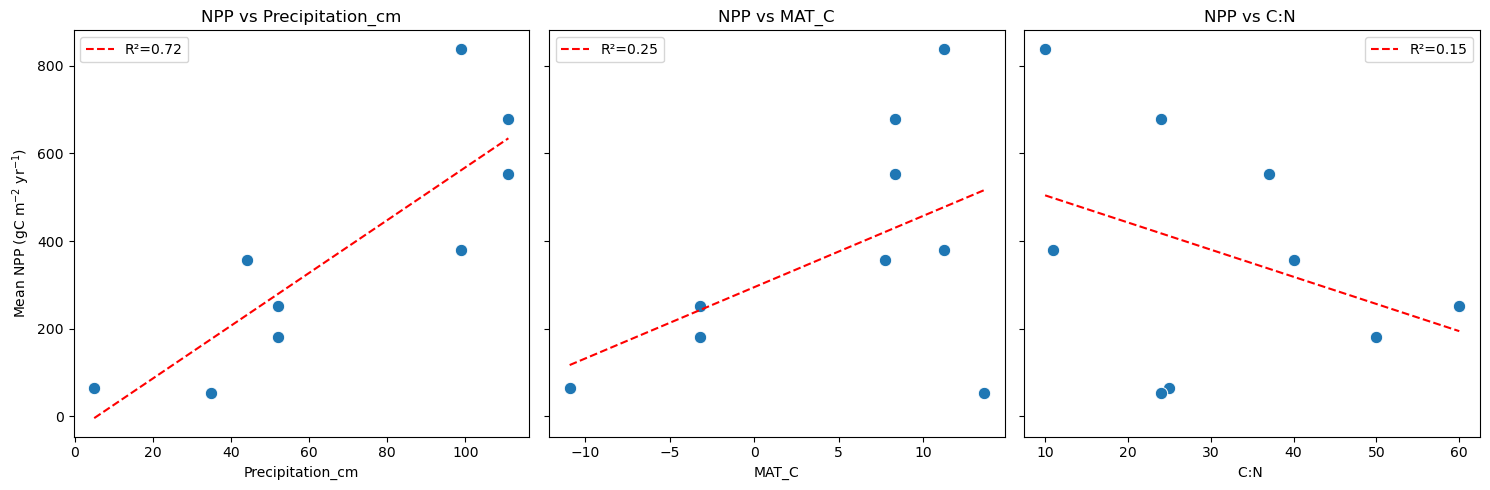

In [ ]:
x_columns = ["Precipitation_cm", "MAT_C", "C:N "]

fig, axes = plt.subplots(1, len(x_columns), figsize=(15, 5), sharey=True)

for i, col in enumerate(x_columns):
    x = npp_df[col]
    y = npp_df["MeanNPPobs_gCm−2yr−1"]

    sns.scatterplot(x=x, y=y, ax=axes[i], s=80, color="tab:blue")

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    x_fit = np.linspace(x.min(), x.max(), 100)
    y_fit = intercept + slope * x_fit
    axes[i].plot(x_fit, y_fit, color="red", linestyle="--", label=f"R²={r_value**2:.2f}")

    axes[i].set_title(f"NPP vs {col}")
    axes[i].set_xlabel(col)
    if i == 0:
        axes[i].set_ylabel("Mean NPP (gC m$^{-2}$ yr$^{-1}$)")
    else:
        axes[i].set_ylabel("")
    axes[i].legend()

plt.tight_layout()
plt.show()


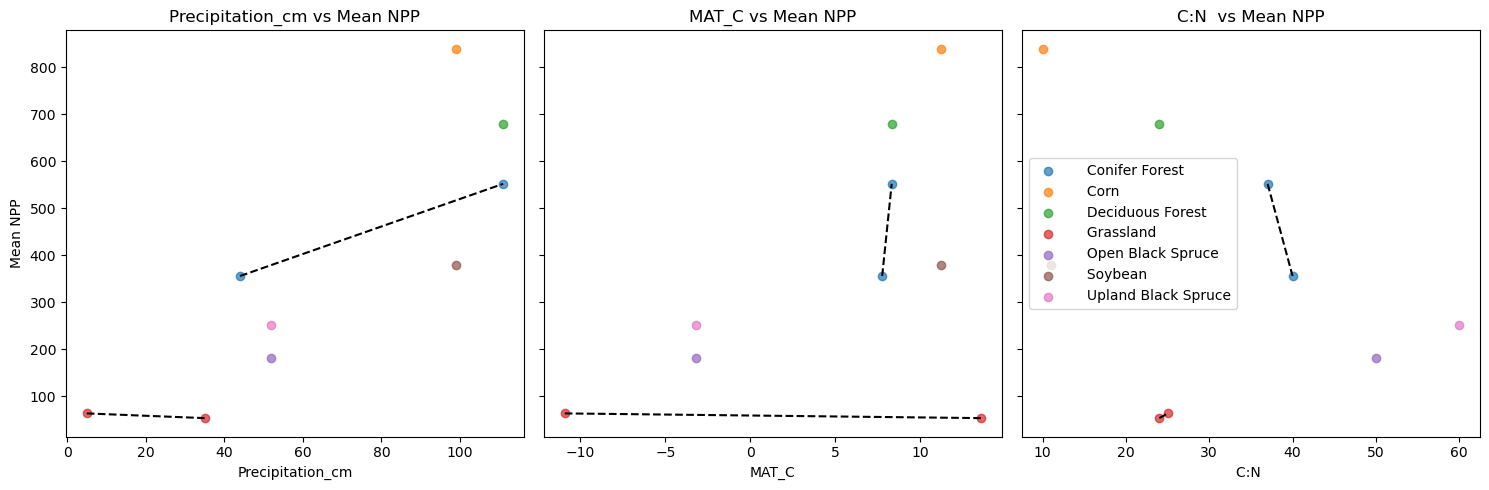

In [28]:
columns_to_plot = [col for col in npp_df.columns if col not in ['MeanNPPobs_gCm−2yr−1', 'Vegetation', 'Site']]

fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(5 * len(columns_to_plot), 5), sharey=True)

for idx, col in enumerate(columns_to_plot):
    ax = axes[idx]
    for name, group in veg_type:
        x = group[col]
        y = group['MeanNPPobs_gCm−2yr−1']
        ax.scatter(x, y, label=name, alpha=0.7)
        # Drop NA values for regression
        mask = x.notna() & y.notna()
        if mask.sum() > 1:
            slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
            x_vals = np.linspace(x[mask].min(), x[mask].max(), 100)
            ax.plot(x_vals, intercept + slope * x_vals, color='black', linestyle='--')
    ax.set_xlabel(col)
    ax.set_title(f'{col} vs Mean NPP')
    if idx == 0:
        ax.set_ylabel('Mean NPP')
    
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
# need to drop na values?
veg_type.plot(kind='box', subplots=True, layout=(1,4), figsize=(10,6), sharex=False, sharey=False)
plt.suptitle('Boxplots of Numeric Columns')
plt.tight_layout()
plt.show()

In [ ]:
# need to drop na values
for name, group in veg_type:
    corr_matrix = group.corr(numeric_only=True)
    plt.figure(figsize=(8,6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix for {name}')
    plt.show()